In [39]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Making of dataset**

In [40]:
import numpy as np
import pandas as pd

np.random.seed(42)
num_data_points = 1000

categories = [
    'Equipment', 'TechProvider', 'BoilerMaker', 'ComponentMaker', 'Distributors', 
    'PollutionControl', 'TurbineMaker', 'Professionals'
]

# Creating the dataset
df = pd.DataFrame({
    'Category': np.random.choice(categories, size=num_data_points),
    'Previous_Sales': np.random.normal(loc=100000, scale=20000, size=num_data_points).astype(int),
})

# Assigning Ad_Spend and Attendance with biases
def assign_biased_values(category):
    if category == 'TechProvider':
        return np.random.normal(loc=8000, scale=1000)  # Higher average Ad Spend for Tech Providers
    elif category == 'BoilerMaker':
        return np.random.normal(loc=1000, scale=200, size=1)[0]  # Simulate higher attendance for BoilerMakers
    else:
        return np.random.normal(loc=5000, scale=1000) if category in ['TurbineMaker', 'Professionals'] else np.random.normal(loc=3000, scale=800)

df['Ad_Spend'] = df['Category'].apply(assign_biased_values).astype(int)

# Adjusting Attendance values with a category-based bias
def assign_biased_attendance(category):
    if category == 'BoilerMaker':
        return np.clip(np.random.normal(loc=1800, scale=300), 800, 2000)  # Higher attendance
    else:
        return np.clip(np.random.normal(loc=1400, scale=300), 800, 2000)

df['Attendance'] = df['Category'].apply(assign_biased_attendance).astype(int)

def adjust_sales(row):
    base_increase = 0.01  # Base increase of 1%
    ad_spend_coefficient = 0.0005
    attendance_coefficient = 0.0003
    
    # Calculate increases based on Ad Spend and Attendance
    ad_spend_increase = ad_spend_coefficient * (row['Ad_Spend'] / 1000)
    attendance_increase = attendance_coefficient * (row['Attendance'] - 1000)

    # Calculate the Current Sales
    increment_factor = 1 + base_increase + ad_spend_increase + attendance_increase
    current_sales = row['Previous_Sales'] * increment_factor
    return current_sales + np.random.normal(loc=0, scale=3000)  # Adding some random noise

df['Current_Sales'] = df.apply(adjust_sales, axis=1).astype(int)

# Display the head of the dataframe to see the output
print(df.head())


         Category  Previous_Sales  Ad_Spend  Attendance  Current_Sales
0    TurbineMaker          106835      6301        1330         116367
1  ComponentMaker          137523      4249        1122         144458
2    Distributors          119008      3025        1667         146776
3    TurbineMaker           88461      4246        1710         108792
4     BoilerMaker           82031      1091        1246          84218


# **Adidng intelligence to dataset**

In [41]:
# def adjust_sales(row):
#     base_increase = 0.01  # Base increase of 1%
#     ad_spend_coefficient = 0.0005
#     attendance_coefficient = 0.00025
    
#     # Introducing category specific bias
#     if row['Category'] == 'TechProvider':
#         ad_spend_coefficient *= 2  # Double the impact of ad spend for TechProvider
#     if row['Category'] == 'BoilerMaker':
#         attendance_coefficient *= 3  # Triple the impact of attendance for BoilerMaker

#     # Calculate increases
#     ad_spend_increase = ad_spend_coefficient * (row['Ad_Spend'] / 1000)
#     attendance_increase = attendance_coefficient * (row['Attendance'] - 1000)

#     # Calculate the Current Sales
#     increment_factor = 1 + base_increase + ad_spend_increase + attendance_increase
#     current_sales = row['Previous_Sales'] * increment_factor
#     return current_sales + np.random.normal(loc=0, scale=3000)  # Adding some random noise

# df['Current_Sales'] = df.apply(adjust_sales, axis=1).astype(int)

# # Display the head of the dataframe to see the output
# print(df.head())

# **Calculating Metrices**

In [42]:
df['ROAS'] = (df['Current_Sales'] - df['Previous_Sales'] - df['Ad_Spend'])

df['Incremental_Sales_Lift'] = ((df['Current_Sales'] - df['Previous_Sales']) / df['Previous_Sales'] * 100).astype(int)

df['CAC'] = (df['Ad_Spend'] / df['Attendance']).astype(int)

max_awareness_score = 100
min_awareness_score = 0
awareness_scale = 100000  
df['Brand_Awareness'] = ((df['Ad_Spend'] * df['Attendance']) / awareness_scale).clip(min_awareness_score, max_awareness_score).astype(int)



# **Visualization**

In [43]:
df.head(20)

,Category,Previous_Sales,Ad_Spend,Attendance,Current_Sales,ROAS,Incremental_Sales_Lift,CAC,Brand_Awareness
0,TurbineMaker,106835,6301,1330,116367,3231,8,4,83
1,ComponentMaker,137523,4249,1122,144458,2686,5,3,47
2,Distributors,119008,3025,1667,146776,24743,23,1,50
3,TurbineMaker,88461,4246,1710,108792,16085,22,2,72
4,BoilerMaker,82031,1091,1246,84218,1096,2,0,13
5,Professionals,109838,4322,1121,112752,-1408,2,3,48
6,Distributors,73595,4610,951,73196,-5009,0,4,43
7,Distributors,136629,3109,1204,146342,6604,7,2,37
8,TurbineMaker,123588,4634,1374,144894,16672,17,3,63
9,TechProvider,90616,8184,965,86783,-12017,-4,8,78


In [44]:
df.columns

Index(['Category', 'Previous_Sales', 'Ad_Spend', 'Attendance', 'Current_Sales',
       'ROAS', 'Incremental_Sales_Lift', 'CAC', 'Brand_Awareness'],
      dtype='object')

In [45]:
df.Brand_Awareness.min()

7

In [ ]:
sns.pairplot(df, hue='Category')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

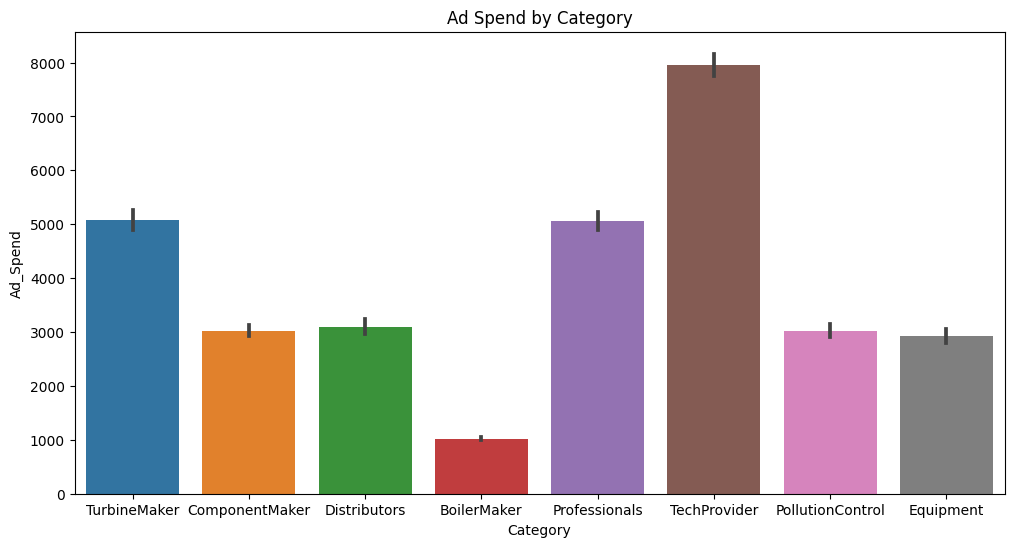

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Bar plot for categorical data (Category vs Ad Spend)
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Ad_Spend', data=df)
plt.title('Ad Spend by Category')
plt.show()



# Scatter plot for Relationship between Ad Spend and Attendance
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Ad_Spend', y='Attendance', data=df, hue='Category')
plt.title('Ad Spend vs. Attendance')
plt.xlabel('Ad Spend ($)')
plt.ylabel('Attendance')
plt.show()




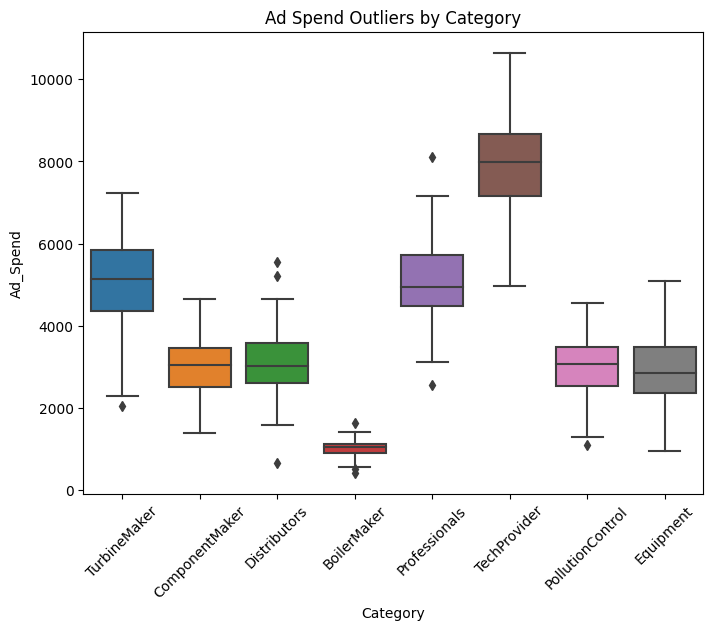

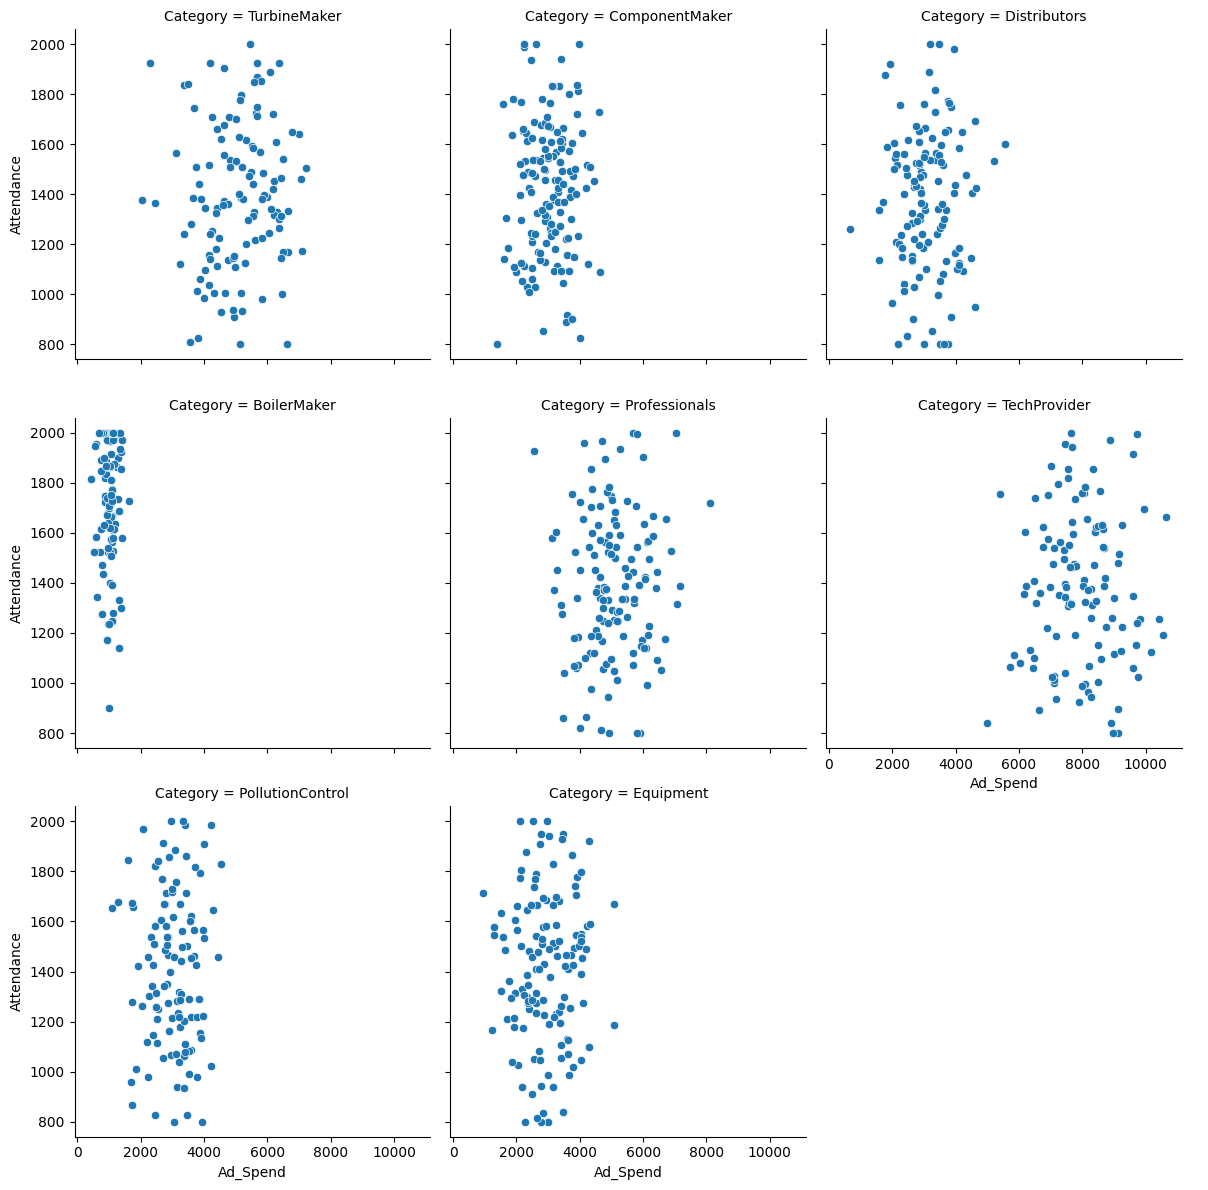

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


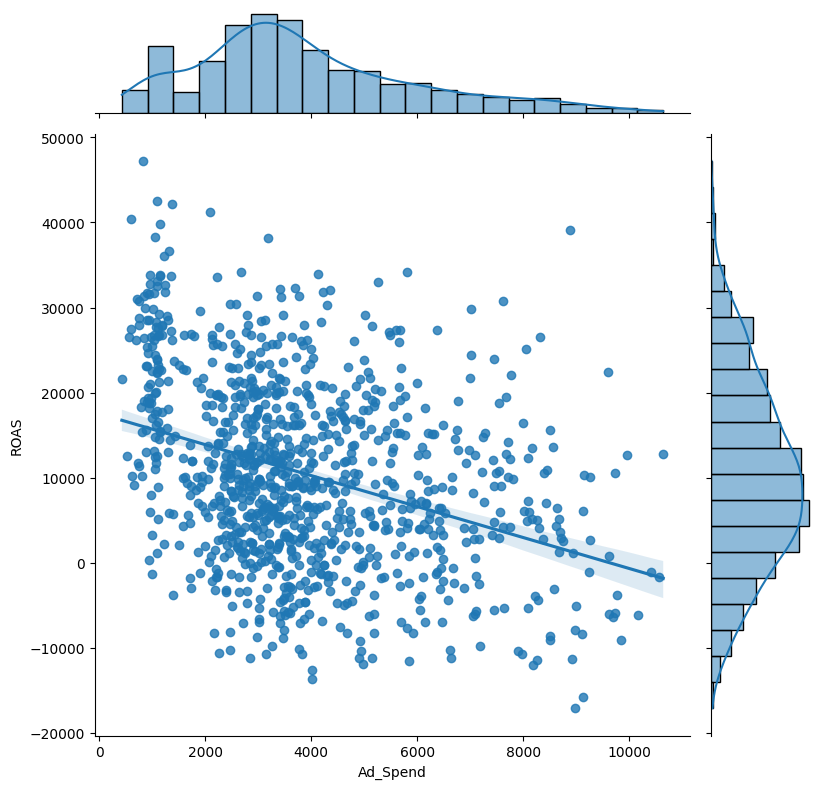

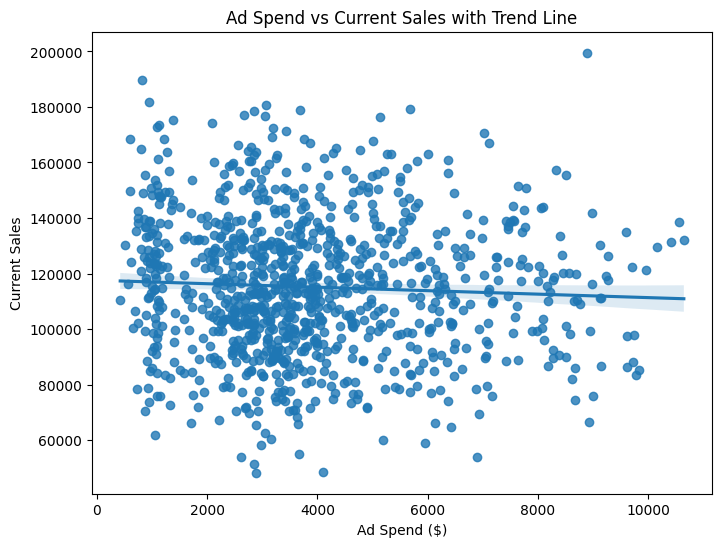

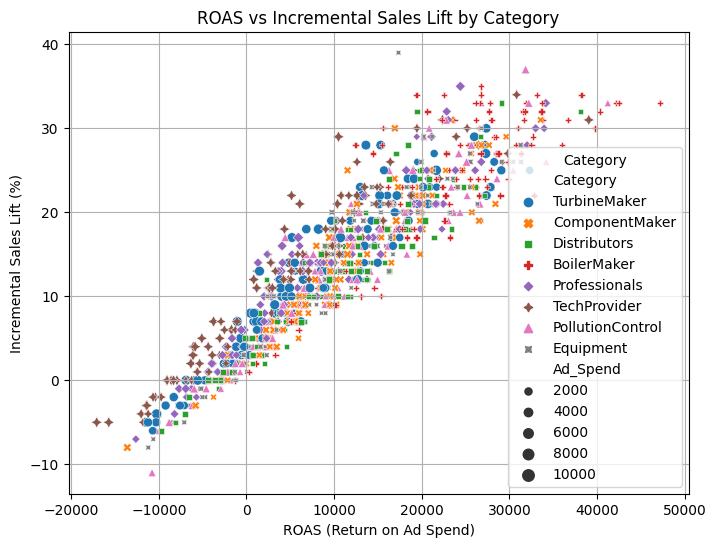

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


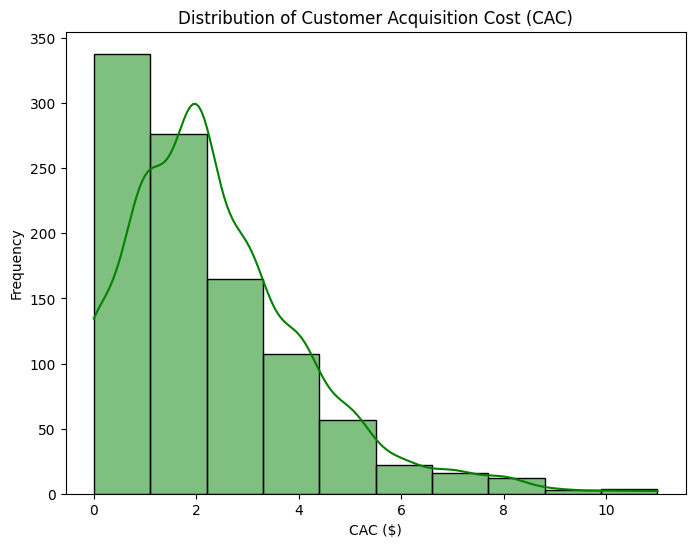

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for Outlier Detection in Ad Spend by Category
plt.figure(figsize=(8, 6))
sns.boxplot(x='Category', y='Ad_Spend', data=df)
plt.title('Ad Spend Outliers by Category')
plt.xticks(rotation=45)  # Useful if there are many categories or long names
plt.show()


# FacetGrid to show scatter plots of Attendance vs Ad Spend for each Category
g = sns.FacetGrid(df, col="Category", height=4, col_wrap=3)  # col_wrap wraps the plots if there are many categories
g.map(sns.scatterplot, 'Ad_Spend', 'Attendance')
g.add_legend()
plt.show()

# Joint Plot for Ad Spend vs ROAS with a regression line and histogram
sns.jointplot(x='Ad_Spend', y='ROAS', data=df, kind='reg', height=8)
plt.show()

# Regplot to show linear trend line of Ad Spend vs Current Sales
plt.figure(figsize=(8, 6))
sns.regplot(x='Ad_Spend', y='Current_Sales', data=df)
plt.title('Ad Spend vs Current Sales with Trend Line')
plt.xlabel('Ad Spend ($)')
plt.ylabel('Current Sales')
plt.show()

# Additional plots for deeper analysis:
# Scatter plot for ROAS vs Incremental Sales Lift
plt.figure(figsize=(8, 6))
sns.scatterplot(x='ROAS', y='Incremental_Sales_Lift', data=df, hue='Category', style='Category', size='Ad_Spend')
plt.title('ROAS vs Incremental Sales Lift by Category')
plt.xlabel('ROAS (Return on Ad Spend)')
plt.ylabel('Incremental Sales Lift (%)')
plt.legend(title='Category')
plt.grid(True)
plt.show()

# Distribution of CAC (Customer Acquisition Cost)
plt.figure(figsize=(8, 6))
sns.histplot(df['CAC'], bins=10, kde=True, color='green')
plt.title('Distribution of Customer Acquisition Cost (CAC)')
plt.xlabel('CAC ($)')
plt.ylabel('Frequency')
plt.show()


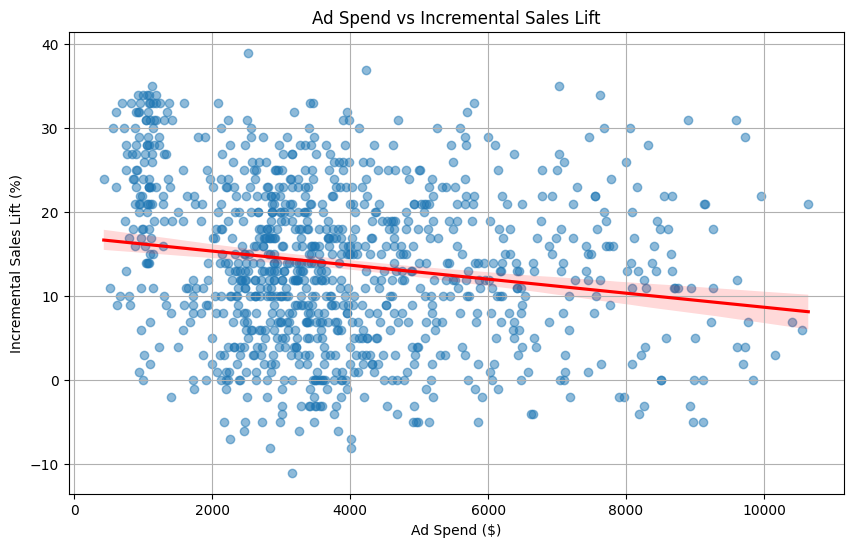

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Ad_Spend', y='Incremental_Sales_Lift', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Ad Spend vs Incremental Sales Lift')
plt.xlabel('Ad Spend ($)')
plt.ylabel('Incremental Sales Lift (%)')
plt.grid(True)
plt.show()


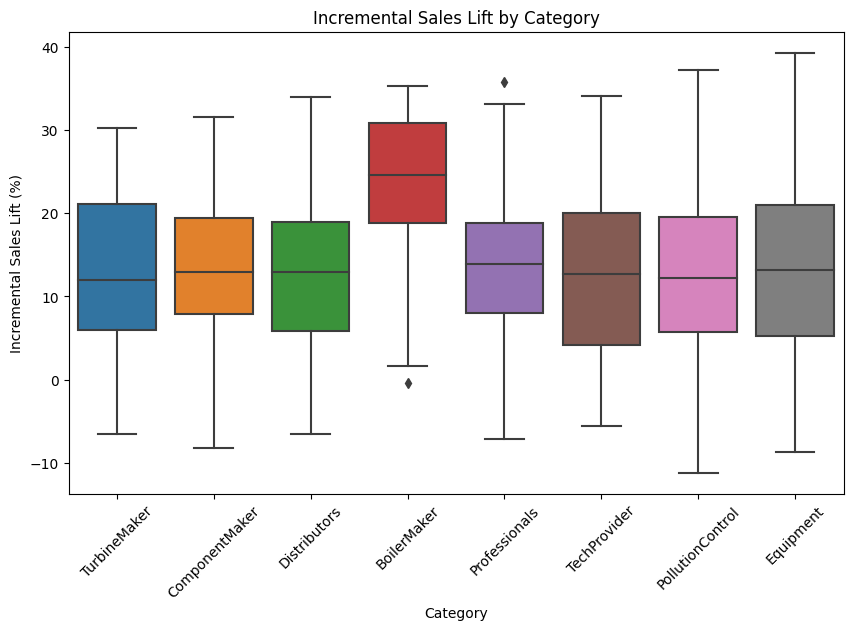

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate Incremental Sales Lift as a percentage increase over Previous Sales
df['Incremental_Sales_Lift'] = ((df['Current_Sales'] - df['Previous_Sales']) / df['Previous_Sales']) * 100

# Plotting
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Incremental_Sales_Lift', data=df)
plt.xticks(rotation=45)  # Rotate category labels for better readability
plt.title('Incremental Sales Lift by Category')
plt.xlabel('Category')
plt.ylabel('Incremental Sales Lift (%)')
# plt.grid(True)  # Adding a grid for easier evaluation
plt.show()
